## Линейная регрессия методом наименьших квадратов (НМК)

Пусть на плоскости задано облако точек

$$
    M_i = (x_i, y_i),\quad i=1,\ldots,n
$$

Требуется приблизить эти точки прямой

$$
    y= \alpha x +\beta
$$

так, чтобы сумма "расстояний" от данных точек до прямой было минимально.


Для этого найдем "расстояние" от каждой точки $M_i$ до прямой:

$$
     r_{i}=y_{i}-y(x_{i})=y_{i}-(\alpha x_i+\beta)
$$

Вычислим сумму квадратов $r_i$:

$$
    \rho(\alpha, \beta)=\sum_{i=1}^n{r_i^2}=\sum_{i=1}^n{(y_i-(\alpha x_i+\beta))^2}
$$

Задача сводится к нахождению коэффицентов линейной зависимости $\alpha$ и $\beta$, при которых функция $\rho(\alpha, \beta)$ принимает наименьшее значение.

При данных переменных сумма квадратов отклонений экспериментальных данных от найденной прямой будет наименьшей.

Для того, чтобы найти минимум функции $\rho(\alpha, \beta)$, необходимо приравнять нулю частные производные функции $\rho(\alpha, \beta)$ по $\alpha$ и $\beta$
$$
\frac{\partial \rho}{\partial \alpha}=0
$$
$$
\frac{\partial \rho}{\partial \beta}=0
$$
Находим эти частные поизводные:
$$
\frac{\partial \rho}{\partial \alpha}=\sum_{i=1}^n{2(-x_i)(y_i-(\alpha x_i+\beta))}=0
$$
$$
\frac{\partial \rho}{\partial \beta}=\sum_{i=1}^n{2(-1)(y_i-(\alpha x_i+\beta))}=0
$$

После алгебраических преобразований получим:

$$
\alpha\sum_{i=1}^n x_i^2 + \beta\sum_{i=1}^n x_i=\sum_{i=1}^n x_i y_i
$$
$$
\alpha\sum_{i=1}^n x_i+ \beta n=\sum_{i=1}^n y_i
$$

Эта система двух линейных уравнений, которую можно записать в матричном виде:
$$
\begin{pmatrix}
  a_1 & a_2\\
  a_3 & a_4
\end{pmatrix} \cdot
\begin{pmatrix}
  \alpha \\
  \beta
\end{pmatrix}=
\begin{pmatrix}
  b_1 \\
  b_2
\end{pmatrix}
$$

где

$$
    a_1=\sum_{i=1}^nx_i^2,\quad a_2=\sum_{i=1}^nx_i
$$

$$
    a_3=a_2=\sum_{i=1}^nx_i,\quad a_4=n
$$

$$
    b_1 = \sum_{i=1}^n x_iy_i,\quad b_2=\sum_{i=1}^ny_i
$$

Решение этой системы, дает решение искомой задачи.

##### ПРИМЕР
Зададим облако точек и построим линейную регрессию методом НМК

**Решение**
Напишем функцию для генерации облака точек

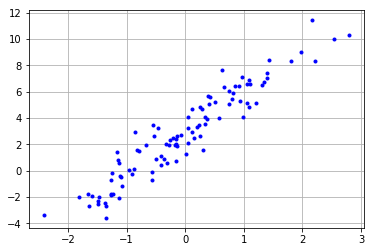

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# x,y - облако точек
# N - число точек 
# m - центр облака точек на оси x
# sx - c.к.о. x_i
# sy - c.к.о. y_i
def get_points(N, m, sx, sy):
    x = np.random.normal(m, sx, size=N)
    y = (2 * x + 3) + np.random.normal(0, sy, size=N)
    return x, y

# x,y из таблицы
def get_table_points():
    x = np.array([1, 2, 3, 4, 5, 6]) 
    y = np.array([4.2, 7.3, 6.1, 9.5, 10.2, 9])
    
    return x, y
    
X, Y = get_points(100, 0, 1, 1)
#X, Y = get_table_points() 


plt.plot(X, Y, '.b')
plt.grid(True)
plt.show()

Вычислим все коеффициенты и правую часть линейной системы МНК

In [2]:
def get_coeff(x, y):
    n = len(x)
    
    a1 = 0
    a2 = 0
    b1 = 0
    b2 = 0
    
    for i in range(n):
        a1 += x[i] **2
        a2 += x[i]
        b1 += x[i] * y[i]
        b2 += y[i]
        
    a3 = a2
    a4 = n
        
    return a1, a2, a3, a4, b1, b2

a1, a2, a3, a4, b1, b2 = get_coeff(X, Y)
print('a1=', a1, 'a2=', a2, 'a3=', a3, 'a4=', a4, 'b1=', b1, 'b2=', b2)

a1= 110.847374467 a2= -2.87572253641 a3= -2.87572253641 a4= 100 b1= 332.261101412 b2= 281.801407262


Найдем решение системы МНК

In [3]:
A = np.array([[a1, a2], [a3, a4]]) # матрица системы
B = np.array([[b1], [b2]]) # столбец правой части системы

print('A = ', A)
print('B = ', B)

V = np.linalg.inv(A).dot(B)# V = A^-1 * B

alpha = V[0]
beta = V[1]

print('V = ', V) # alpha beta - решение

A =  [[ 110.84737447   -2.87572254]
 [  -2.87572254  100.        ]]
B =  [[ 332.26110141]
 [ 281.80140726]]
V =  [[ 3.07286527]
 [ 2.90638115]]


Построим нашу прямую и облако точек

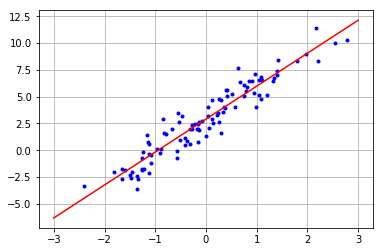

In [4]:
xnew = np.linspace(-3, 3, 100)
#xnew = np.linspace(0, 7, 100)

ynew = alpha * xnew + beta

plt.plot(X, Y, '.b', xnew, ynew, '-r')
plt.grid(True)
plt.show()